In [ ]:
"""
CSCI3230 / ESTR3108 2021-22 First Term Assignment 3
I declare that the assignment here submitted is original except for source
material explicitly acknowledged, and that the same or closely related material
has not been previously submitted for another course. I also acknowledge that I
am aware of University policy and regulations on honesty in academic work, and
of the disciplinary guidelines and procedures applicable to breaches of such
policy and regulations, as contained in the following websites.
University Guideline on Academic Honesty:
http://www.cuhk.edu.hk/policy/academichonesty/
Faculty of Engineering Guidelines to Academic Honesty:
http://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf
Student Name: Lam Hiu Ching
Student ID : 1155129247
"""

'\nCSCI3230 / ESTR3108 2021-22 First Term Assignment 3\nI declare that the assignment here submitted is original except for source\nmaterial explicitly acknowledged, and that the same or closely related material\nhas not been previously submitted for another course. I also acknowledge that I\nam aware of University policy and regulations on honesty in academic work, and\nof the disciplinary guidelines and procedures applicable to breaches of such\npolicy and regulations, as contained in the following websites.\nUniversity Guideline on Academic Honesty:\nhttp://www.cuhk.edu.hk/policy/academichonesty/\nFaculty of Engineering Guidelines to Academic Honesty:\nhttp://www.erg.cuhk.edu.hk/erg-intra/upload/documents/ENGG_Discipline.pdf\nStudent Name: Lam Hiu Ching\nStudent ID : 1155129247\n'

In [57]:
import torch
import numpy as np
from google.colab import files
import pandas as pd
from matplotlib import pyplot as plt
df1 = files.upload()
df2 = files.upload()

Saving train_q3(1).csv to train_q3(1) (1).csv


Saving test_q3(1).csv to test_q3(1) (1).csv


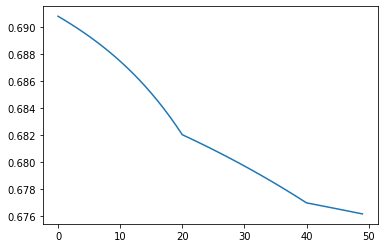

w1:  tensor([[ 0.2656,  0.4745, -0.1379]], requires_grad=True)
w2:  tensor([[ 0.2613,  0.4189, -0.0420]], grad_fn=<TBackward0>)
Accuracy: 100.0 %


In [61]:
#Question Q3c(1)(2)
train_x = torch.tensor(pd.read_csv('train_q3(1).csv')['x']).unsqueeze(1).float()
train_y = torch.tensor(pd.read_csv('train_q3(1).csv')['y']).unsqueeze(1).float()

w1 = torch.tensor([[0.12, 0.26, -0.15]], device='cpu', requires_grad=True)
w2 = torch.tensor(torch.tensor([[0.11, 0.13, 0.07]]).t().tolist(), device='cpu', requires_grad=True)

train_loss = []
init_lr = 0.5
for i in range(50):
  lr = init_lr * pow(0.3, i//20)
  y_pred = train_x.mm(w1).clamp(min=0).mm(w2)

  loss = torch.nn.functional.binary_cross_entropy_with_logits(y_pred, train_y, reduction='mean')
  train_loss.append(loss.item())
  loss.backward()

  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

  w1.grad.zero_()
  w2.grad.zero_()

plt.plot([_ for _ in range(50)], train_loss)
plt.show()
print("w1: ",w1)
print("w2: ",w2.t())

#Question Q3c(3)
test_x = torch.tensor(pd.read_csv('test_q3(1).csv')['x']).unsqueeze(1).float()
test_y = torch.tensor(pd.read_csv('test_q3(1).csv')['y']).unsqueeze(1).float()

y_pred = test_x.mm(w1).clamp(min=0).mm(w2)
y_pred = torch.sigmoid(y_pred) > 0.5

acc = 0
for i in range(len(test_y)):
  if (y_pred[i] == test_y[i]):
    acc += 1

print('Accuracy:',acc/len(test_y)*100.0, '%')

